# Task

Scrape data from the web

The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

The team leader wants you to focus on reviews specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data. 

Analyse data

Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.

Please ensure that you have created a folder called "data" and mapped your file path.

Present insights

Your manager would like you to summarise your findings within a single PowerPoint slide, so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations in order to quickly provide the key points from your analysis. Use the “PowerPoint Template” provided to complete the slide

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
import matplotlib.pyplot as plt

In [2]:
url ='https://www.airlinequality.com/airline-reviews/british-airways'

### How to get the headers

Right click and then hit inspect on the webpage you are trying to get data from.

next, click on console, 

next in console, type navigator.userAgent

and then copy the link that shows up.

In [3]:
headers = {
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 Edg/108.0.1462.54'
}

In [4]:
r = requests.get(url, {'headers': headers})

In [5]:
soup = bs4.BeautifulSoup(r.text, 'html.parser')

In [6]:
review =soup.find_all('article', {'itemprop': 'review'})
review

[<article class="comp comp_media-review-rated list-item media position-content review-827444" itemprop="review" itemscope="" itemtype="http://schema.org/Review">
 <meta content="2023-01-17" itemprop="datePublished"/>
 <div class="rating-10" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
 <span itemprop="ratingValue">1</span>/<span itemprop="bestRating">10</span>
 </div>
 <div class="body" id="anchor827444">
 <h2 class="text_header">"you should let me use the lounge"</h2>
 <h3 class="text_sub_header userStatusWrapper">
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
 <span itemprop="name">Jozef Kis</span></span> (United Kingdom) <time datetime="2023-01-17" itemprop="datePublished">17th January 2023</time></h3>
 <div class="tc_mobile">
 <div class="text_content" itemprop="reviewBody">✅ <strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Trip Verified</em></a></strong> |  Being a silver flyer and booking a flight thr

In [7]:
rating = review[1].find('span').text
rating

'3'

In [8]:
title = review[1].find('h2').text
title

'"I find BA incredibly tacky"'

In [9]:
text = review[0].find('div',{'class': 'text_content'}).text
text

'✅ Trip Verified |  Being a silver flyer and booking a flight through BA to Dublin you would have thought I could use the lounge even though BA used Air Lingus for the flight. Travelled recently there with the same situation and was allowed in by a kind Gentleman at the desk even though he said I had to be Gold ? He was really accommodating and it wasn’t a big deal. But the two ladies on the desk were like no. No empathy there at all-saying the other guy shouldn’t have let me and they will have a word with him ? Come on BA I booked the flight through you, and you made me fly with Air Lingus so you should let me use the lounge as a silver flier. '

In [10]:
import pandas as pd

In [11]:
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways/page/{}/'

In [12]:
res = requests.get(base_url.format('1'))

In [13]:
soup2 = bs4.BeautifulSoup(res.text, 'html.parser')

In [14]:
def get_soup(url):
    r = requests.get(url, {'headers': headers})
    soup = bs4.BeautifulSoup(r.text, 'html.parser')
    return soup

In [15]:
data =[]

In [16]:
def get_reviews(soup):
    review =soup.find_all('article', {'itemprop': 'review'})
    try:
        for item in review:
            reviews = {
                'rating': item.find('span').text.strip(),
                'title': item.find('h2').text.strip(),
                'text': item.find('div',{'class': 'text_content'}).text.strip()
            }
            data.append(reviews)
    except:
        pass
    

In [17]:
for x in range(1,345):
    soup = get_soup(f'https://www.airlinequality.com/airline-reviews/british-airways/page/{x}/')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(data))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
80
Getting page: 9
90
Getting page: 10
100
Getting page: 11
110
Getting page: 12
120
Getting page: 13
130
Getting page: 14
140
Getting page: 15
150
Getting page: 16
160
Getting page: 17
170
Getting page: 18
180
Getting page: 19
190
Getting page: 20
200
Getting page: 21
210
Getting page: 22
220
Getting page: 23
230
Getting page: 24
240
Getting page: 25
250
Getting page: 26
260
Getting page: 27
270
Getting page: 28
280
Getting page: 29
290
Getting page: 30
300
Getting page: 31
310
Getting page: 32
320
Getting page: 33
330
Getting page: 34
340
Getting page: 35
350
Getting page: 36
360
Getting page: 37
370
Getting page: 38
380
Getting page: 39
390
Getting page: 40
400
Getting page: 41
410
Getting page: 42
420
Getting page: 43
430
Getting page: 44
440
Getting page: 45
450
Getting page: 46
460
Getting page: 47
470
Getting page: 48
480
Getting pa

In [18]:
df = pd.DataFrame(data, 
                 columns =['rating', 'title', 'text'])
df 

,rating,title,text
0,1,"""you should let me use the lounge""",✅ Trip Verified | Being a silver flyer and bo...
1,3,"""I find BA incredibly tacky""",Not Verified | I find BA incredibly tacky and...
2,4,"""This flight was so disappointing""",✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
3,5,"""just an average airline""",Not Verified | Great thing about British Airw...
4,1,"""Luggage is delayed""",Not Verified | The staff are friendly. The pla...
...,...,...,...
3435,7,British Airways customer review,JFK to LHR. Empty check in and priority securi...
3436,10,British Airways customer review,Chicago O'Hare to London Heathrow on 2 May. ch...
3437,10,British Airways customer review,Travelled to HKG on board the new A380. Boardi...
3438,1,British Airways customer review,BA 059 London to Cape Town April 29 2014 econo...


In [19]:
df.shape

(3440, 3)

In [20]:
df.to_csv('britishAir_reviews.csv')

## check for null values

In [21]:
df.isnull().sum()

rating    0
title     0
text      0
dtype: int64

## let's rescale the rating values from 0 to 5

In [22]:
df['rating'].value_counts()

1                 753
2                 389
3                 383
8                 348
10                312
7                 305
9                 300
4                 234
5                 224
6                 187
Ray Desjardins      2
D Thomas            1
J Whittle           1
Jackie Craig        1
Name: rating, dtype: int64

## Converting Dask DataFrame object columns to numbers with to_numeric

In [23]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce").astype('Int64')

In [24]:
df.dtypes

rating     Int64
title     object
text      object
dtype: object

In [25]:
df['rating'].value_counts()

1     753
2     389
3     383
8     348
10    312
7     305
9     300
4     234
5     224
6     187
Name: rating, dtype: Int64

In [26]:
df.head()

,rating,title,text
0,1,"""you should let me use the lounge""",✅ Trip Verified | Being a silver flyer and bo...
1,3,"""I find BA incredibly tacky""",Not Verified | I find BA incredibly tacky and...
2,4,"""This flight was so disappointing""",✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
3,5,"""just an average airline""",Not Verified | Great thing about British Airw...
4,1,"""Luggage is delayed""",Not Verified | The staff are friendly. The pla...


In [27]:
df.text = df.text.str.lower()

In [28]:
df.isnull().sum()

rating    5
title     0
text      0
dtype: int64

In [29]:
df =df.dropna()

In [30]:
df.isnull().sum()

rating    0
title     0
text      0
dtype: int64

In [31]:
df['rating'] = df['rating']/2

In [32]:
df.head()

,rating,title,text
0,0.5,"""you should let me use the lounge""",✅ trip verified | being a silver flyer and bo...
1,1.5,"""I find BA incredibly tacky""",not verified | i find ba incredibly tacky and...
2,2.0,"""This flight was so disappointing""",✅ trip verified | flew atl to lhr 8th jan 202...
3,2.5,"""just an average airline""",not verified | great thing about british airw...
4,0.5,"""Luggage is delayed""",not verified | the staff are friendly. the pla...


In [33]:
df['rating'].value_counts()

0.5    753
1.0    389
1.5    383
4.0    348
5.0    312
3.5    305
4.5    300
2.0    234
2.5    224
3.0    187
Name: rating, dtype: Int64

In [34]:
def sentiments(rating):
    if (rating ==5) or (rating == 4.5):
        return 'positive'
    elif (rating == 4) or (rating == 3.5):
        return 'positive'
    elif rating == 3:
        return 'neutral'
        
    elif (rating == 2.5) or (rating == 2):
        return 'negative'
    elif (rating == 1.5) or (rating == 1):
        return 'negative'
    elif rating == 0.5:
        return 'negative'

In [35]:
data2 = df.copy()

In [36]:
data2["Sentiment"] = data2["rating"].apply(sentiments)

In [37]:
print(data2['Sentiment'])

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
3435    positive
3436    positive
3437    positive
3438    negative
3439    negative
Name: Sentiment, Length: 3435, dtype: object


In [78]:
data2

,rating,title,text,Sentiment
0,0.5,"""you should let me use the lounge""",✅ trip verified | being a silver flyer and bo...,negative
1,1.5,"""I find BA incredibly tacky""",not verified | i find ba incredibly tacky and...,negative
2,2.0,"""This flight was so disappointing""",✅ trip verified | flew atl to lhr 8th jan 202...,negative
3,2.5,"""just an average airline""",not verified | great thing about british airw...,negative
4,0.5,"""Luggage is delayed""",not verified | the staff are friendly. the pla...,negative
...,...,...,...,...
3435,3.5,British Airways customer review,jfk to lhr. empty check in and priority securi...,positive
3436,5.0,British Airways customer review,chicago o'hare to london heathrow on 2 may. ch...,positive
3437,5.0,British Airways customer review,travelled to hkg on board the new a380. boardi...,positive
3438,0.5,British Airways customer review,ba 059 london to cape town april 29 2014 econo...,negative


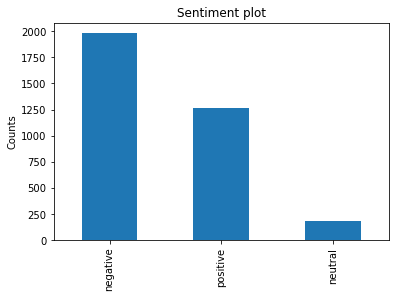

In [39]:
data2['Sentiment'].value_counts().plot(kind = 'bar', title = 'Sentiment plot')
plt.ylabel('Counts')
plt.show()

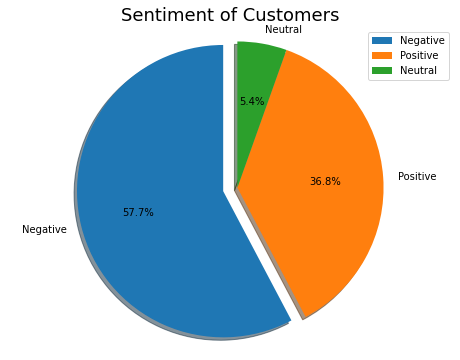

In [85]:
plt.figure(figsize = (8,6))
sentiment = ['Negative', 'Positive', 'Neutral']
counts = [1983,1265,187]
explode = (0.1, 0,0)

plt.pie(counts, explode=explode, labels=sentiment,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Sentiment of Customers', size = 18)
plt.legend(sentiment, loc="best")
plt.show()

In [40]:
data2['Sentiment'].value_counts()

negative    1983
positive    1265
neutral      187
Name: Sentiment, dtype: int64

# Sentiment analysis

In [41]:
review_df =data2[['text', 'Sentiment']]
review_df.head()

,text,Sentiment
0,✅ trip verified | being a silver flyer and bo...,negative
1,not verified | i find ba incredibly tacky and...,negative
2,✅ trip verified | flew atl to lhr 8th jan 202...,negative
3,not verified | great thing about british airw...,negative
4,not verified | the staff are friendly. the pla...,negative


Let's remove neutral sentiment and focus on both positive and negative sentiments

In [42]:
review_df = review_df[review_df['Sentiment'] != 'neutral']
print(review_df.shape)
review_df.head()

(3248, 2)


,text,Sentiment
0,✅ trip verified | being a silver flyer and bo...,negative
1,not verified | i find ba incredibly tacky and...,negative
2,✅ trip verified | flew atl to lhr 8th jan 202...,negative
3,not verified | great thing about british airw...,negative
4,not verified | the staff are friendly. the pla...,negative


In [43]:
review_df['Sentiment'].value_counts()

negative    1983
positive    1265
Name: Sentiment, dtype: int64

let's retrieve all text data from the dataset

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
import textblob
from textblob import Word
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\philippe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\philippe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# STEPS TO CLEAN THE REVIEWS :

1. Remove HTML tags

2. Remove special characters

3. Convert everything to lowercase

4. Remove stopwords
    
5. Stemming

## 1. Remove HTML tags

In [47]:
def clean(text):
    
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

In [48]:
review_df.text = review_df.text.apply(clean)
review_df.text[0]

'✅ trip verified |  being a silver flyer and booking a flight through ba to dublin you would have thought i could use the lounge even though ba used air lingus for the flight. travelled recently there with the same situation and was allowed in by a kind gentleman at the desk even though he said i had to be gold ? he was really accommodating and it wasn’t a big deal. but the two ladies on the desk were like no. no empathy there at all-saying the other guy shouldn’t have let me and they will have a word with him ? come on ba i booked the flight through you, and you made me fly with air lingus so you should let me use the lounge as a silver flier.'

## 2. Remove special characters

In [49]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

In [50]:
review_df.text = review_df.text.apply(is_special)
review_df.text[0]

'  trip verified    being a silver flyer and booking a flight through ba to dublin you would have thought i could use the lounge even though ba used air lingus for the flight  travelled recently there with the same situation and was allowed in by a kind gentleman at the desk even though he said i had to be gold   he was really accommodating and it wasn t a big deal  but the two ladies on the desk were like no  no empathy there at all saying the other guy shouldn t have let me and they will have a word with him   come on ba i booked the flight through you  and you made me fly with air lingus so you should let me use the lounge as a silver flier '

## 3. Convert everything to lowercase

In [51]:
def to_lower(text):
    text = text.lower()
    return text

In [52]:
review_df.text = review_df.text.apply(to_lower)
review_df.text[0]

'  trip verified    being a silver flyer and booking a flight through ba to dublin you would have thought i could use the lounge even though ba used air lingus for the flight  travelled recently there with the same situation and was allowed in by a kind gentleman at the desk even though he said i had to be gold   he was really accommodating and it wasn t a big deal  but the two ladies on the desk were like no  no empathy there at all saying the other guy shouldn t have let me and they will have a word with him   come on ba i booked the flight through you  and you made me fly with air lingus so you should let me use the lounge as a silver flier '

## 4. Remove stopwords

In [53]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

In [54]:
review_df.text = review_df.text.apply(rem_stopwords)
review_df.text[0]

['trip',
 'verified',
 'silver',
 'flyer',
 'booking',
 'flight',
 'ba',
 'dublin',
 'would',
 'thought',
 'could',
 'use',
 'lounge',
 'even',
 'though',
 'ba',
 'used',
 'air',
 'lingus',
 'flight',
 'travelled',
 'recently',
 'situation',
 'allowed',
 'kind',
 'gentleman',
 'desk',
 'even',
 'though',
 'said',
 'gold',
 'really',
 'accommodating',
 'big',
 'deal',
 'two',
 'ladies',
 'desk',
 'like',
 'empathy',
 'saying',
 'guy',
 'let',
 'word',
 'come',
 'ba',
 'booked',
 'flight',
 'made',
 'fly',
 'air',
 'lingus',
 'let',
 'use',
 'lounge',
 'silver',
 'flier']

In [55]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\philippe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
review_df['sent_sum'] = review_df.Sentiment.replace({'negative' : '0', 'positive': 1})

In [57]:
review_df.head()

,text,Sentiment,sent_sum
0,"[trip, verified, silver, flyer, booking, fligh...",negative,0
1,"[verified, find, ba, incredibly, tacky, consta...",negative,0
2,"[trip, verified, flew, atl, lhr, 8th, jan, 202...",negative,0
3,"[verified, great, thing, british, airways, a38...",negative,0
4,"[verified, staff, friendly, plane, cold, shive...",negative,0


In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## wordcloud Function

In [59]:
# wordcloud function



def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud

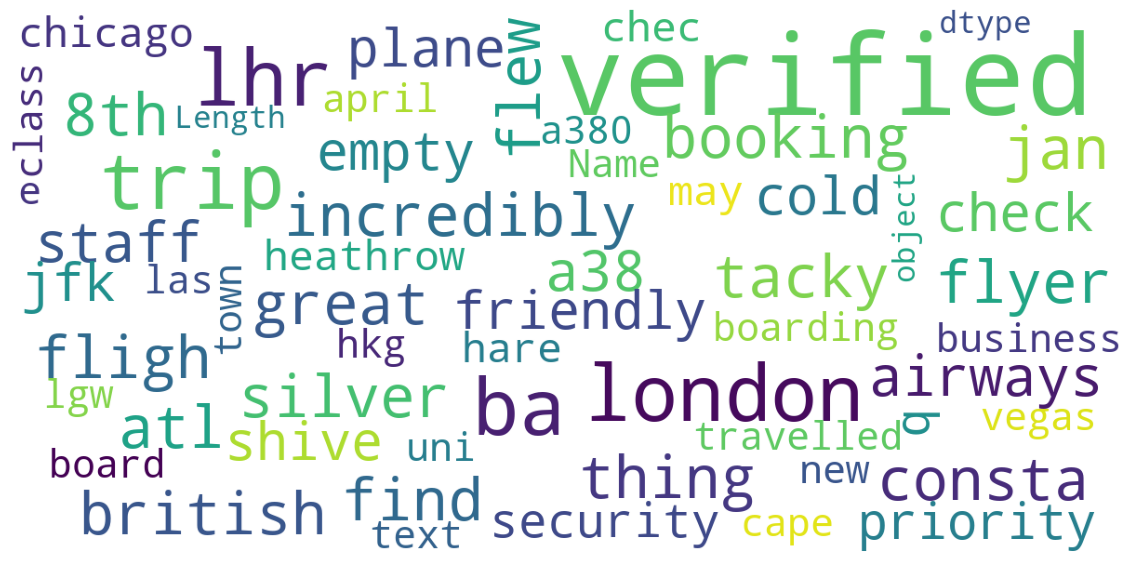

In [60]:
show_wordcloud(review_df["text"])

## 5. Stem the words

In [61]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

In [62]:
review_df.text = review_df.text.apply(stem_txt)
review_df.text[0]

'trip verifi silver flyer book flight ba dublin would thought could use loung even though ba use air lingus flight travel recent situat allow kind gentleman desk even though said gold realli accommod big deal two ladi desk like empathi say guy let word come ba book flight made fli air lingus let use loung silver flier'

## let's create the model and import relevant libraries

In [63]:
review_df.head()

,text,Sentiment,sent_sum
0,trip verifi silver flyer book flight ba dublin...,negative,0
1,verifi find ba incred tacki constant look way ...,negative,0
2,trip verifi flew atl lhr 8th jan 2023 unlucki ...,negative,0
3,verifi great thing british airway a380 economi...,negative,0
4,verifi staff friend plane cold shiver gave lig...,negative,0


In [64]:
sentiment_label = review_df.Sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 Index(['negative', 'positive'], dtype='object'))

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


First, retrieve all the text data from the dataset and  tokenize all the words in the text with the help of Tokenizer

In [66]:
tweet = review_df.text.values
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)


In [67]:
print(tokenizer.word_index)

{'flight': 1, 'seat': 2, 'ba': 3, 'servic': 4, 'time': 5, 'food': 6, 'london': 7, 'crew': 8, 'british': 9, 'airway': 10, 'good': 11, 'verifi': 12, 'cabin': 13, 'class': 14, 'hour': 15, 'airlin': 16, 'busi': 17, 'board': 18, 'one': 19, 'staff': 20, 'trip': 21, 'check': 22, 'get': 23, 'heathrow': 24, 'would': 25, 'fli': 26, 'economi': 27, 'passeng': 28, 'first': 29, 'return': 30, 'drink': 31, 'offer': 32, 'meal': 33, 'plane': 34, 'travel': 35, 'arriv': 36, 'loung': 37, 'club': 38, 'us': 39, 'use': 40, 'even': 41, 'back': 42, 'lhr': 43, 'book': 44, 'review': 45, 'custom': 46, 'experi': 47, 'could': 48, 'serv': 49, 'delay': 50, 'new': 51, 'like': 52, 'bag': 53, 'aircraft': 54, 'day': 55, '2': 56, 'comfort': 57, 'ask': 58, 'minut': 59, 'go': 60, 'told': 61, 'realli': 62, 'long': 63, 'take': 64, 'call': 65, 'well': 66, 'way': 67, 'friend': 68, 'leg': 69, 'great': 70, 'choic': 71, 'airport': 72, '3': 73, 'year': 74, 'world': 75, 'better': 76, 'premium': 77, 'got': 78, 'pay': 79, 'much': 80, '

In [68]:
print(tweet[0])
print(encoded_docs[0])

trip verifi silver flyer book flight ba dublin would thought could use loung even though ba use air lingus flight travel recent situat allow kind gentleman desk even though said gold realli accommod big deal two ladi desk like empathi say guy let word come ba book flight made fli air lingus let use loung silver flier
[21, 12, 675, 640, 44, 1, 3, 758, 25, 329, 48, 40, 37, 41, 159, 3, 40, 179, 2099, 1, 35, 287, 540, 216, 621, 2200, 330, 41, 159, 132, 590, 62, 816, 428, 614, 85, 558, 330, 52, 2100, 123, 932, 335, 911, 196, 3, 44, 1, 98, 26, 179, 2099, 335, 40, 37, 675, 2201]


In [69]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   21   12  675  640   44    1    3  758   25  329   48
   40   37   41  159    3   40  179 2099    1   35  287  540  216  621
 2200  330   41  159  132  590   62  816  428  614   85  558  330   52
 2100  123  932  335  911  196    3   44    1   98   26  179 2099  335
   40 

## Build the Text Classifier

For sentiment analysis project, we use LSTM layers in the machine learning model. The architecture of our model consists of an embedding layer, an LSTM layer, and a Dense layer at the end. To avoid overfitting, we introduced the Dropout mechanism in-between the LSTM layers.

In [70]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           283360    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 300,011
Trainable params: 300,011
Non-trainable params: 0
__________________________________________________

## Train the sentiment analysis model

Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

In [71]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
82/82 [==============================] - 19s 186ms/step - loss: 0.6136 - accuracy: 0.6686 - val_loss: 0.5344 - val_accuracy: 0.7923
Epoch 2/5
82/82 [==============================] - 15s 178ms/step - loss: 0.3531 - accuracy: 0.8695 - val_loss: 0.4590 - val_accuracy: 0.7831
Epoch 3/5
82/82 [==============================] - 15s 182ms/step - loss: 0.2470 - accuracy: 0.9095 - val_loss: 0.2819 - val_accuracy: 0.8754
Epoch 4/5
82/82 [==============================] - 16s 193ms/step - loss: 0.1746 - accuracy: 0.9369 - val_loss: 0.2748 - val_accuracy: 0.8769
Epoch 5/5
82/82 [==============================] - 18s 225ms/step - loss: 0.1442 - accuracy: 0.9503 - val_loss: 0.3074 - val_accuracy: 0.8677


The python sentiment analysis model obtained 95.05% accuracy on the training set and 86.64% accuracy on the test set.

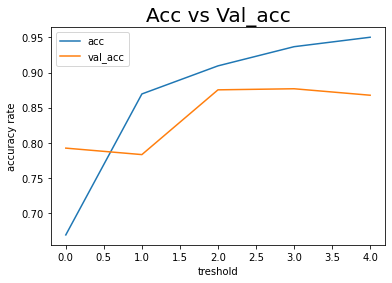

<Figure size 432x288 with 0 Axes>

In [72]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.ylabel('accuracy rate')
plt.xlabel('treshold')
plt.title('Acc vs Val_acc', size = 20)
plt.show()
plt.savefig("Accuracy plot.jpg")

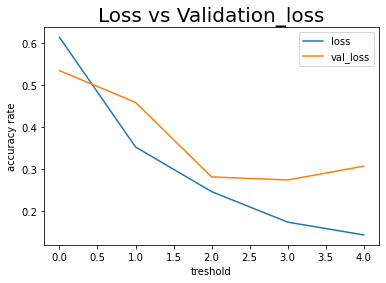

<Figure size 432x288 with 0 Axes>

In [73]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylabel('accuracy rate')
plt.xlabel('treshold')
plt.title('Loss vs Validation_loss', size = 20)
plt.show()
plt.savefig("Loss plot.jpg")

## Let’s execute sentiment analysis model

Define a function that takes a text as input and outputs its prediction label

In [74]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [75]:
test_sentence2 = "I enjoyed my journey on this flight."

test_sentence1 = "This is the worst flight experience of my life!, I would never recommend it to anyone"


In [76]:
predict_sentiment(test_sentence1)

1/1 [==============================] - 1s 911ms/step
Predicted label:  negative


In [77]:
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 43ms/step
Predicted label:  positive


# Conclusion

We have successfully developed python sentiment analysis model. In this machine learning project, we built a binary text classifier that classifies the sentiment of the tweets into positive and negative. We obtained more than 87% accuracy on validation.